# I. Setup and Data

In [18]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz'
df = pd.read_csv(url, compression='gzip')

df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [19]:
len(df)

48204

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [21]:
df.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


In [22]:
df.isna().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [23]:
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.sort_values('date_time').reset_index(drop=True)

In [24]:
df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.dayofweek    # Monday=0
df['month'] = df['date_time'].dt.month
df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)
df[['date_time', 'hour', 'weekday', 'is_weekend']].head()

,date_time,hour,weekday,is_weekend
0,2012-10-02 09:00:00,9,1,0
1,2012-10-02 10:00:00,10,1,0
2,2012-10-02 11:00:00,11,1,0
3,2012-10-02 12:00:00,12,1,0
4,2012-10-02 13:00:00,13,1,0


### . Exploration Techniques Applied

- **Non-Graphical EDA:**

In [28]:
traffic = df['traffic_volume']

mean_val = traffic.mean()
median_val = traffic.median()
mode_val = traffic.mode()[0]
std_val = traffic.std()
range_val = traffic.max() - traffic.min()
skew_val  = traffic.skew()         
kurt_val  = traffic.kurtosis() 
print(f"Mean traffic volume      : {mean_val:.2f}")
print(f"Median traffic volume    : {median_val:.2f}")
print(f"Mode traffic volume      : {mode_val:.2f}")
print(f"Standard deviation (std) : {std_val:.2f}")
print(f"Range (max - min)        : {range_val:.2f}")
print(f"Skewness :         {skew_val:.3f}")
print(f"Kurtosis :          {kurt_val:.3f}")

Mean traffic volume      : 3259.82
Median traffic volume    : 3380.00
Mode traffic volume      : 353.00
Standard deviation (std) : 1986.86
Range (max - min)        : 7280.00
Skewness :         -0.089
Kurtosis :          -1.309


In [ ]:
print(" Frequency Table: weather_main ")
print(df['weather_main'].value_counts())
# حساب المتوسط والانحراف المعياري لكل فئة من الطقس
weather_stats = df.groupby('weather_main')['traffic_volume'].agg(['mean', 'std']).sort_values('mean', ascending=False)
print(weather_stats)


 Frequency Table: weather_main 
weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64
                     mean          std
weather_main                          
Clouds        3618.449749  1906.202879
Haze          3502.101471  1873.511057
Rain          3317.905501  1982.228705
Drizzle       3290.727073  1997.901830
Smoke         3237.650000  1978.015893
Clear         3055.908819  1987.101411
Snow          3016.844228  1900.185883
Thunderstorm  3001.620890  1988.296012
Mist          2932.956639  2073.025670
Fog           2703.720395  2125.525863
Squall        2061.750000  1950.070490


In [33]:
print("Frequency Table: holiday")
print(df['holiday'].fillna('None').value_counts())

Frequency Table: holiday
holiday
None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: count, dtype: int64


- **Graphical EDA:** 

Text(0, 0.5, 'Frequency')

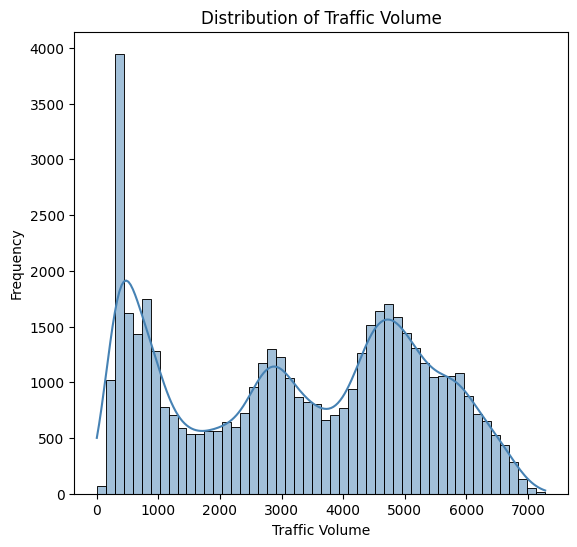

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['traffic_volume'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

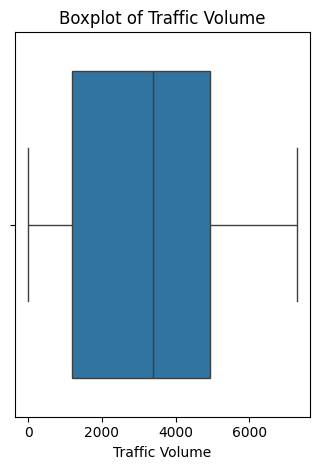

In [40]:
# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['traffic_volume'])
plt.title('Boxplot of Traffic Volume')
plt.xlabel('Traffic Volume')

plt.tight_layout()
plt.show()

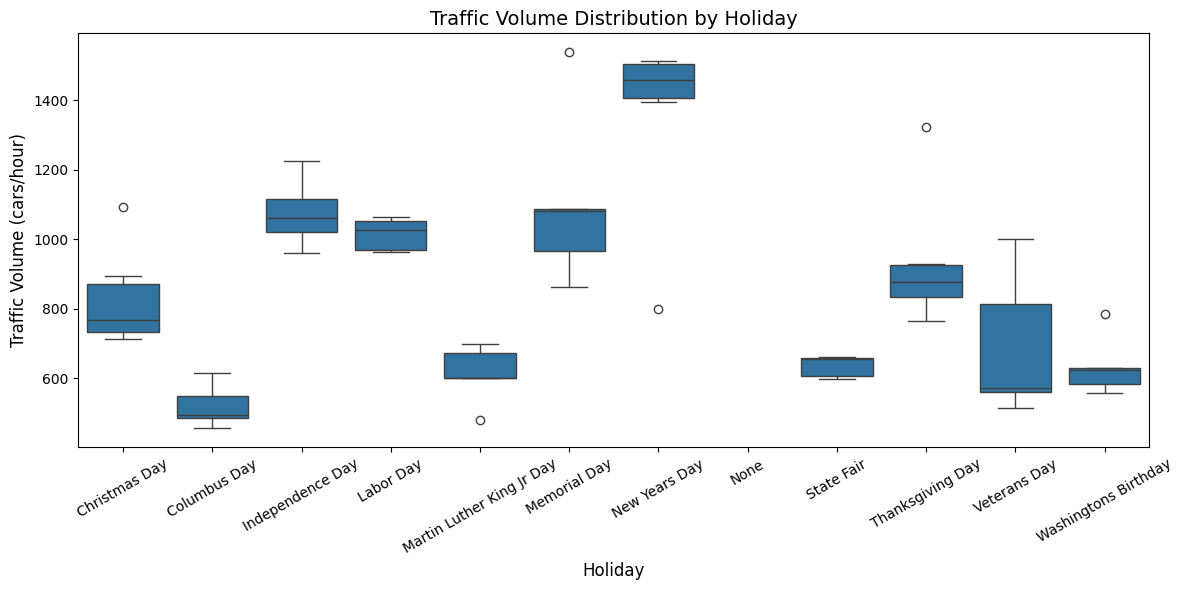

In [51]:

col = 'traffic_volume'

plt.figure(figsize=(12,6))

order = sorted(df['holiday'].fillna('None').unique())

sns.boxplot(x='holiday', y=col, data=df, order=order,)
plt.title("Traffic Volume Distribution by Holiday", fontsize=14)
plt.xlabel("Holiday", fontsize=12)
plt.ylabel("Traffic Volume (cars/hour)", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


- **Multivariate Analysis:**

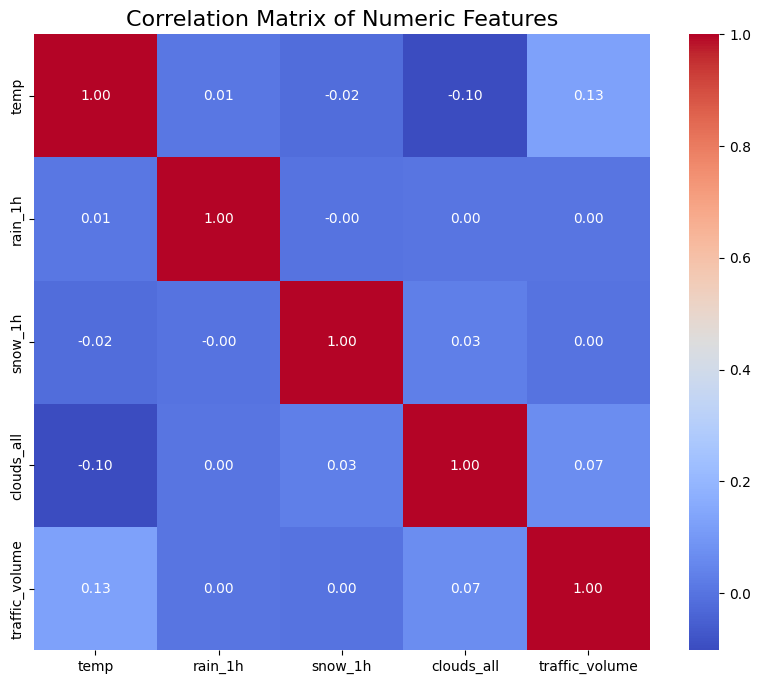

In [57]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()

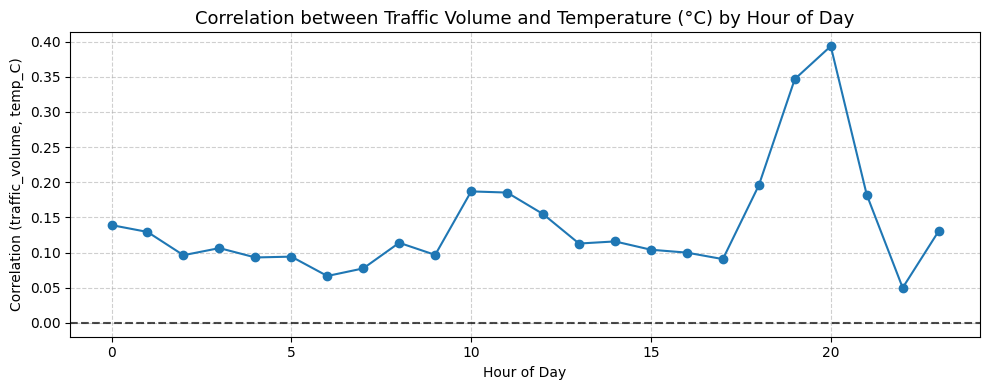

In [65]:
# حساب الارتباط بين temp_C و traffic_volume لكل ساعة من اليوم
df['temp_C'] = df['temp'] - 273.15
hourly_corrs = (
    df.groupby('hour')[['traffic_volume', 'temp_C']]
      .corr()
      .loc[:, 'traffic_volume']
      .unstack()['temp_C']
)
plt.figure(figsize=(10,4))
hourly_corrs.plot(marker='o', color='tab:blue')
plt.axhline(0, color='k', linestyle='--', alpha=0.7)
plt.title("Correlation between Traffic Volume and Temperature (°C) by Hour of Day", fontsize=13)
plt.xlabel("Hour of Day")
plt.ylabel("Correlation (traffic_volume, temp_C)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [67]:

display(hourly_corrs.describe())

count    24.000000
mean      0.140088
std       0.080903
min       0.049909
25%       0.095748
50%       0.113381
75%       0.161650
max       0.393533
Name: temp_C, dtype: float64

## II. Question solutions

### 2.1. Generating Summary Statistics (Non-Graphical EDA)


#### Task A: Overall Descriptive Statistics

1- المقارنة بين المتوسط والوسيط:

المتوسط (3259.82) أقل من الوسيط (3380.00) بفارق بسيط.

هذا يعني أن هناك بعض القيم الصغيرة جدًا (مثل فترات منتصف الليل) التي تسحب المتوسط للأسفل قليلًا.

2- لذلك نتوقع أن التوزيع قريب من المتماثل لكنه يميل قليلًا نحو اليسار (Left-skewed).

#### Task B: Skewness and Kurtosis

1. تحليل Skewness (الالتواء)

قيمة الالتواء سالبة (-0.089)، أي يوجد ميل بسيط إلى اليسار.

ومع ذلك، القيمة صغيرة جدًا وقريبة من الصفر، ما يعني أن التوزيع شبه متماثل.

بالرجوع إلى نتائج Task A (حيث كان المتوسط ≈ 3259 < الوسيط ≈ 3380)،
نستنتج أن التوزيع يميل قليلًا نحو اليسار — وهذا يتطابق تمامًا مع دلالة الالتواء.


2. تحليل Kurtosis 

قيمة kurtosis تساوي –1.309، وهي أقل من 0.

هذا يعني أن التوزيع أقل حدة من التوزيع الطبيعي (Platykurtic).

الذيلان أقل سمكًا، والقيم المتطرفة قليلة، أي لا توجد قمم حادة أو تجمع قوي حول المتوسط.

#### Task C: Multivariate Analysis via Grouping

1. weather_main ذات أعلى متوسط مرور

الفئة Clouds تمتلك أعلى متوسط: 3618.45 cars/hour
في الأيام الغائمة، يكون الطقس معتدلًا (لا أمطار ولا حرارة شديدة)،
مما يسمح بنشاط مروري طبيعي أو حتى أعلى من المتوسط.
لا توجد عوامل تعيق التنقل، مثل الأمطار أو الثلوج.

الحالة الجوية ذات أعلى (std)

الفئتان Fog (2125.53) و Mist (2073.03) تمتلكان أكبر تشتت.
في هذه الحالات، تختلف كثافة الضباب أو الرؤية بشدة من حالة إلى أخرى،
مما يجعل المرور غير متوقع — أحيانًا طبيعي، وأحيانًا منخفض جدًا.

### 2.2. Visualizing Distributions and Variability (Graphical EDA)

#### Task A: Histogram for Distribution

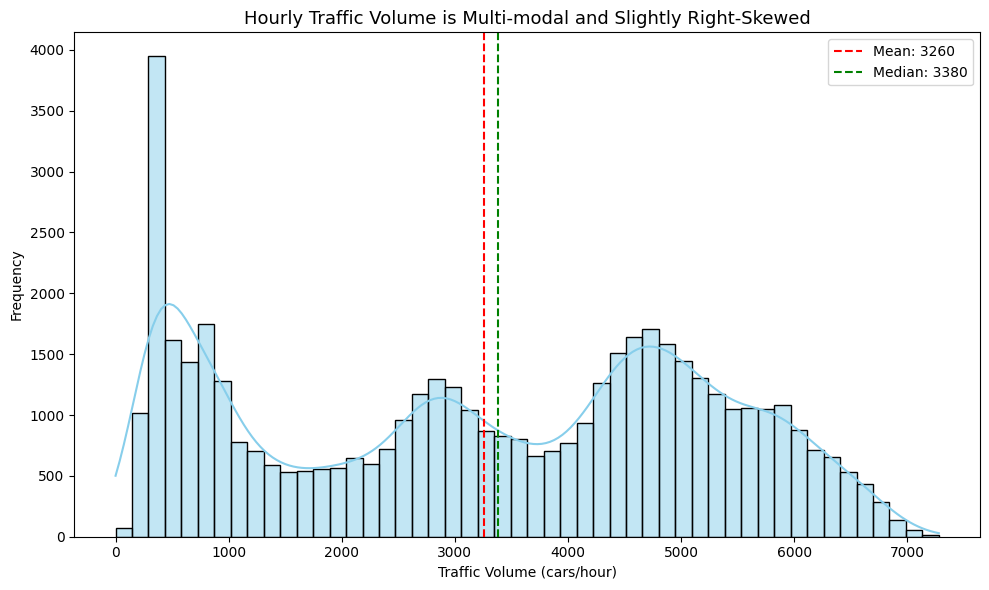

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], bins=50, kde=True, color='skyblue')


plt.axvline(df['traffic_volume'].mean(), color='red', linestyle='--', label=f"Mean: {df['traffic_volume'].mean():.0f}")
plt.axvline(df['traffic_volume'].median(), color='green', linestyle='--', label=f"Median: {df['traffic_volume'].median():.0f}")


plt.title("Hourly Traffic Volume is Multi-modal and Slightly Right-Skewed", fontsize=13)
plt.xlabel("Traffic Volume (cars/hour)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


#### Task B: Box Plot for Dispersion

In [74]:
Q1 = df['traffic_volume'].quantile(0.25)
Q3 = df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1  = {Q1:.0f}")
print(f"Q3  = {Q3:.0f}")
print(f"IQR = {IQR:.0f}")


Q1  = 1193
Q3  = 4933
IQR = 3740


IQR مرتفع جدًا،فهذا يعني أن حركة المرور متغيرة جدًا

### 2.3. Visualizing Correlation

#### Task A: Correlation Matrix and Heatmap

temp يظهر أقوى ارتباط مطلق ضعيف وإيجابي مع traffic_volume .وهو ارتباط موجب .

#### Task B: Interpretation and Paradox

الارتباط لا يعني سببًا: حتى لو كان temp مرتبطًا بزيادة traffic_volume هذا لا يعني أن الحرارة هي السبب الحقيقي.لكن السبب الحقيقي غالبًا هو عوامل زمنية أو اجتماعية

### 2.4. Interactive Charting Tools (Plotly/Altair) - Optional/Bonus

In [78]:
import plotly.express as px

fig = px.scatter(
    df,
    x='temp',
    y='traffic_volume',
    hover_data=['weather_description'],
    title="Traffic Volume vs Temperature (Interactive Plot)",
    labels={'temp': 'Temperature (K)', 'traffic_volume': 'Traffic Volume (cars/hour)'},
    opacity=0.6
)

fig.update_layout(
    xaxis=dict(title='Temperature (K)'),
    yaxis=dict(title='Traffic Volume (cars/hour)'),
    title=dict(x=0.5)
)

fig.show()
